In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [224]:
df=pd.read_csv('abalone.csv')

In [158]:
bestfeature=SelectKBest(score_func=chi2,k='all')
fit=bestfeature.fit(x,y)

In [160]:
score=fit.scores_

In [164]:
scores=pd.DataFrame({'value':score,'column':col})

In [166]:
scores.sort_values('value')

,value,column
0,10.254648,Sex
3,23.430133,Height
2,56.575037,Diameter
1,63.321896,Length
6,111.962402,Viscera weight
7,165.788566,Shell weight
5,197.289851,Shucked weight
4,515.350640,Whole weight


In [163]:
col=x.columns

In [134]:
x.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.674537,0.604152,0.716938,0.473814,0.317805,0.387298
1,0.591608,0.514782,0.474868,0.315436,0.220227,0.264575
2,0.728011,0.648074,0.822800,0.506458,0.376165,0.458258
3,0.663325,0.604152,0.718331,0.464220,0.337639,0.393700
4,0.574456,0.504975,0.452769,0.299166,0.198746,0.234521


In [288]:
le=LabelEncoder()

In [289]:
df['Sex']=le.fit_transform(df['Sex'])

In [290]:
scaling=StandardScaler()

In [291]:
col=df.columns

In [292]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [293]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E08D03860>,
      dtype=object)

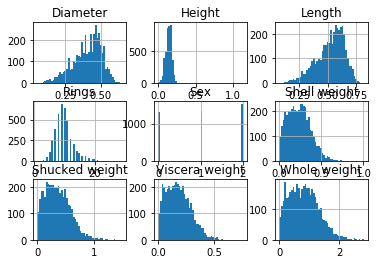

In [294]:
df.hist(bins=50)

In [295]:
lr=LinearRegression()

In [338]:
x=df.iloc[:,0:-1]

In [297]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [340]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [299]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
lr.score(xtrain,ytrain)

0.536174988111613

In [301]:
pred=lr.predict(xtest)

In [302]:
r2_score(pred,ytest)

0.024131903638742735

In [303]:
ada=AdaBoostRegressor(base_estimator=rfr,n_estimators=100)

In [304]:
ada.fit(xtrain,ytrain)
ada.score(xtrain,ytrain)

0.9737203793584738

In [305]:
pred_a=ada.predict(xtest)

In [306]:
r2_score(pred_a,ytest)

0.17598285719080842

In [307]:
from scipy.stats import zscore

In [308]:
dtc=DecisionTreeRegressor()

In [309]:
dtc.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [310]:
dtc.score(xtrain,ytrain)

1.0

In [311]:
pred_dtc=dtc.predict(xtest)

In [312]:
r2_score(pred_dtc,ytest)

0.15367119957717423

In [313]:
rfr=RandomForestRegressor()

In [314]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [315]:
rfr.score(xtrain,ytrain)

0.9104100962558984

In [316]:
pred_r=rfr.predict(xtest)

In [317]:
r2_score(pred_r,ytest)

0.16692884955382303

In [320]:
knn=KNeighborsRegressor()

In [321]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [322]:
pred_knn=knn.predict(xtest)
r2_score(pred_knn,ytest)

0.024752713566021156

In [326]:
mb=MultinomialNB()

In [341]:
mb.fit(xtrain,ytrain)
pred_mb=mb.predict(xtest)
accuracy_score(pred_mb,ytest)

0.1645933014354067

In [216]:
imp=dtc.feature_importances_

In [217]:
cols=x.columns

In [218]:
impcol=pd.DataFrame({'cols':cols,'imp':imp})

In [198]:
impcol.sort_values('imp')

,cols,imp
0,Height,0.058592
3,Viscera weight,0.093605
1,Whole weight,0.111122
2,Shucked weight,0.214692
4,Shell weight,0.521990


In [334]:
df.drop('Sex',axis=1,inplace=True)

In [337]:
df.drop('Diameter',axis=1,inplace=True)